In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.neighbors import KNeighborsClassifier 

from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix as CM 
from sklearn import model_selection 
from sklearn.model_selection import learning_curve 
from sklearn.metrics import precision_recall_curve 


In [3]:
%matplotlib inline
data = pd.read_csv("C:/Users/jstep/Downloads/german_credit_data/german.data", sep=" ",header=None)
col_mapping = {0:"checking_account", 
               1:"duration",
               2:"credit_history",
               3:"purpose",
               4:"credit_amt",
               5:"savings_acct",
               6:"employment",
               7:"installment_rate_percent",
               8:"gender_status",
               9:"other_debtors",
              10:"residence_since",
              11:"property",
              12:"age",
              13:"other_installment_plans",
              14:"housing",
              15:"no_existing_credits",
              16:"job",
              17:"no_people_liable",
              18:"has_telephone",
              19:"is_foreign_worker",
              20:"good_bad"}
data.columns = [col_mapping[col] for col in data.columns]
data["good_bad"] = np.where(data["good_bad"] == 2, 1, 0)


In [9]:
data_df = pd.get_dummies(data, drop_first=True)

In [11]:
classifier_list = ["Logistic_Regression","Random_Forest","Gradient_Boosting", "KNN"]
classifier_models = {
               'Logistic_Regression': LogisticRegression(class_weight='balanced'),
               'Random_Forest': RandomForestClassifier(n_estimators=50, class_weight='balanced'),
               'Gradient_Boosting': GradientBoostingClassifier(max_depth=5),
               'K_NN': KNeighborsClassifier(n_neighbors=5, weights='distance')
}

n_runs = 10
test_size = 0.3

In [19]:
score_ls = []

signals_df = data_df[[c for c in data_df.columns if c != 'good_bad']].values
response_sr = data_df['good_bad'].values

for ic, (cl_name, Classifier) in enumerate(classifier_models.items()):
    for trial in range(n_runs):
        train_signals, test_signals, train_labels, test_labels = train_test_split(signals_df, response_sr, test_size = test_size)
        Classifier.fit(train_signals, train_labels)
        pred_labels = Classifier.predict(test_signals)
        precision = precision_score(test_labels, pred_labels, average='binary')
        score_ls.append([cl_name, precision, 'Precision'])
        recall = recall_score(test_labels, pred_labels, average='binary')
        score_ls.append([cl_name, recall,'Recall'])
        F1 = f1_score(test_labels, pred_labels, average='binary')
        score_ls.append([cl_name, F1,'f1 Score'])

C:\Users\jstep\Anaconda3\envs\MonotonicWOE\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jstep\Anaconda3\envs\MonotonicWOE\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

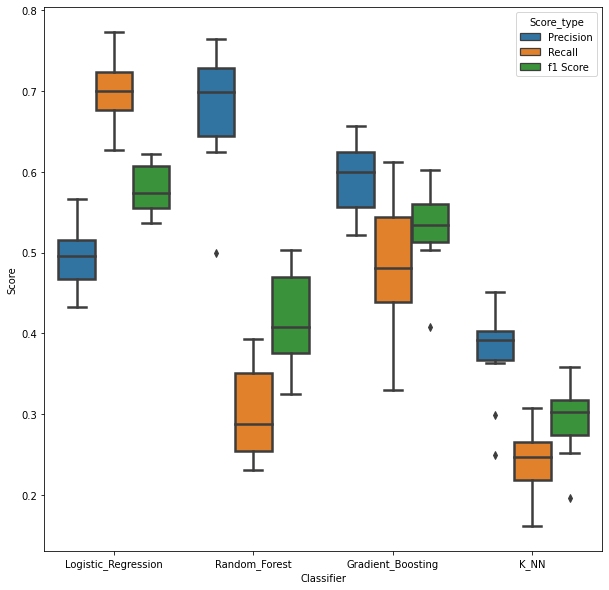

In [20]:
metrics_df = pd.DataFrame(score_ls, columns=['Classifier','Score','Score_type']) #building a dataframe with various metrics
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="Classifier", y="Score", hue="Score_type", data=metrics_df, linewidth=2.5)

In [22]:
# choose random forest
Classifier = RandomForestClassifier(n_estimators=100, class_weight='balanced')
train_signals, test_signals, train_labels, test_labels = train_test_split(signals_df, response_sr, test_size = test_size)
Classifier.fit(train_signals, train_labels)
predictions = Classifier.predict_proba(test_signals)[:,1]  

precision_ls, recall_ls, thresholds_ls = precision_recall_curve(test_labels, predictions)
thresholds_ls = np.append(thresholds_ls, 1)
review_rate_ls = [] #Initialize the queue rate as an empty list
for threshold in thresholds_ls:  
    review_rate_ls.append((predictions >= threshold).mean())

Text(0, 0.5, 'Proportion')

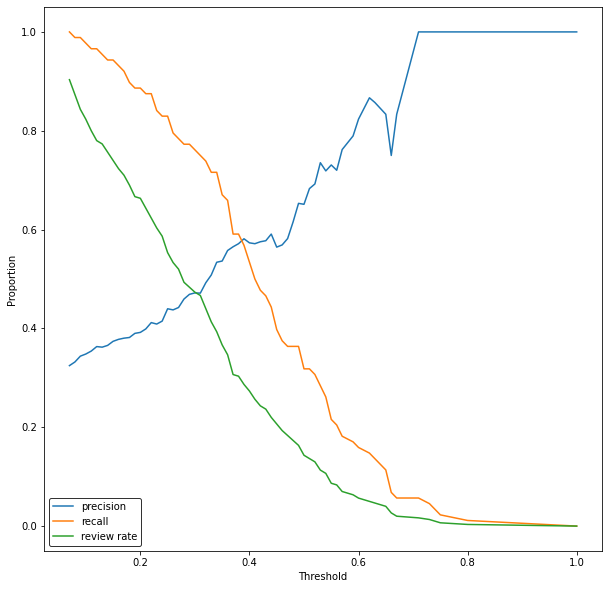

In [23]:
plt.figure(figsize=(10,10))
plt.plot(thresholds_ls, precision_ls)
plt.plot(thresholds_ls, recall_ls)
plt.plot(thresholds_ls, review_rate_ls)
Legend = plt.legend(('precision', 'recall', 'review rate'), frameon=True, loc='best') 
Legend.get_frame().set_edgecolor('k')  
plt.xlabel('Threshold')  
plt.ylabel('Proportion') 

In [25]:
# shap values
import shap

In [26]:
explainer = shap.TreeExplainer(Classifier)

In [27]:
shap_values = explainer.shap_values(train_signals)


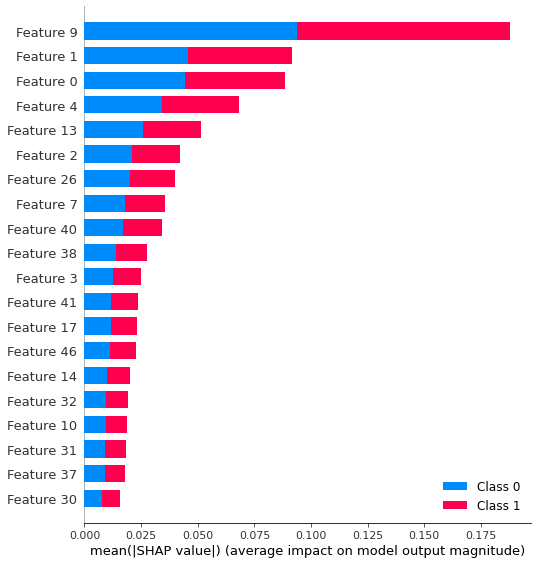

In [29]:
shap.summary_plot(shap_values, train_signals)

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [24]:
! git add .
! git commit -m "adding a one-hot-encoding flow"
! git push

The file will have its original line endings in your working directory
The file will have its original line endings in your working directory
The file will have its original line endings in your working directory
The file will have its original line endings in your working directory


[master 887132c] adding a one-hot-encoding flow
 4 files changed, 543 insertions(+), 55 deletions(-)
 rename .ipynb_checkpoints/{workflow-checkpoint.ipynb => workflow encode-checkpoint.ipynb} (100%)
 create mode 100644 .ipynb_checkpoints/workflow normal-checkpoint.ipynb
 rename workflow.ipynb => workflow encode.ipynb (96%)
 create mode 100644 workflow normal.ipynb


To https://github.com/jstephenj14/classification-model-workflow.git
   5194483..887132c  master -> master
